Mean Squared Error: 1446974303.939387
Coefficients:
               Coefficient
GrLivArea        33.604783
BedroomAbvGr  -8412.389145
FullBath      -4688.922006
OverallQual   18497.777407
OverallCond    5563.189108
YearBuilt       430.189910
YearRemodAdd    153.254444
TotalBsmtSF      15.479796
1stFlrSF         23.449093
2ndFlrSF         13.783268
GarageCars    11007.841560
GarageArea        9.389479
TotRmsAbvGrd   3851.844028
LotFrontage     -36.771416
LotArea           0.633324


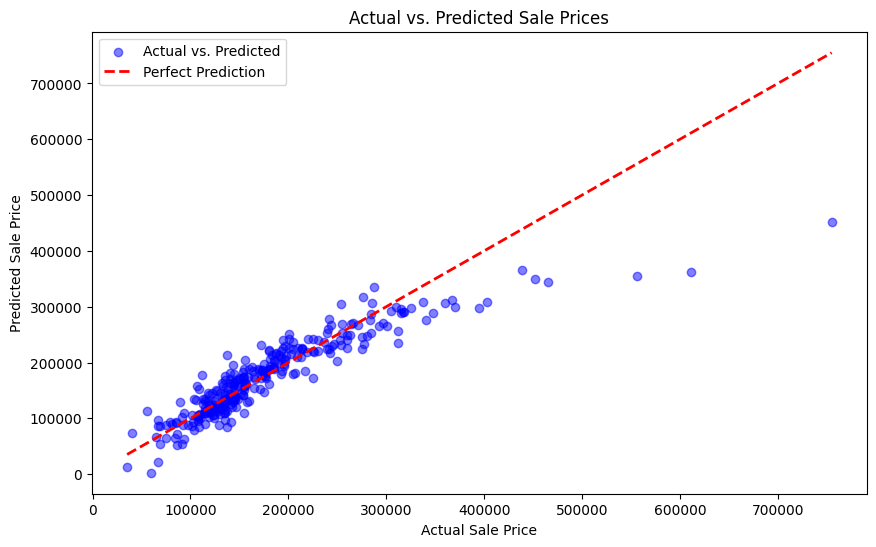

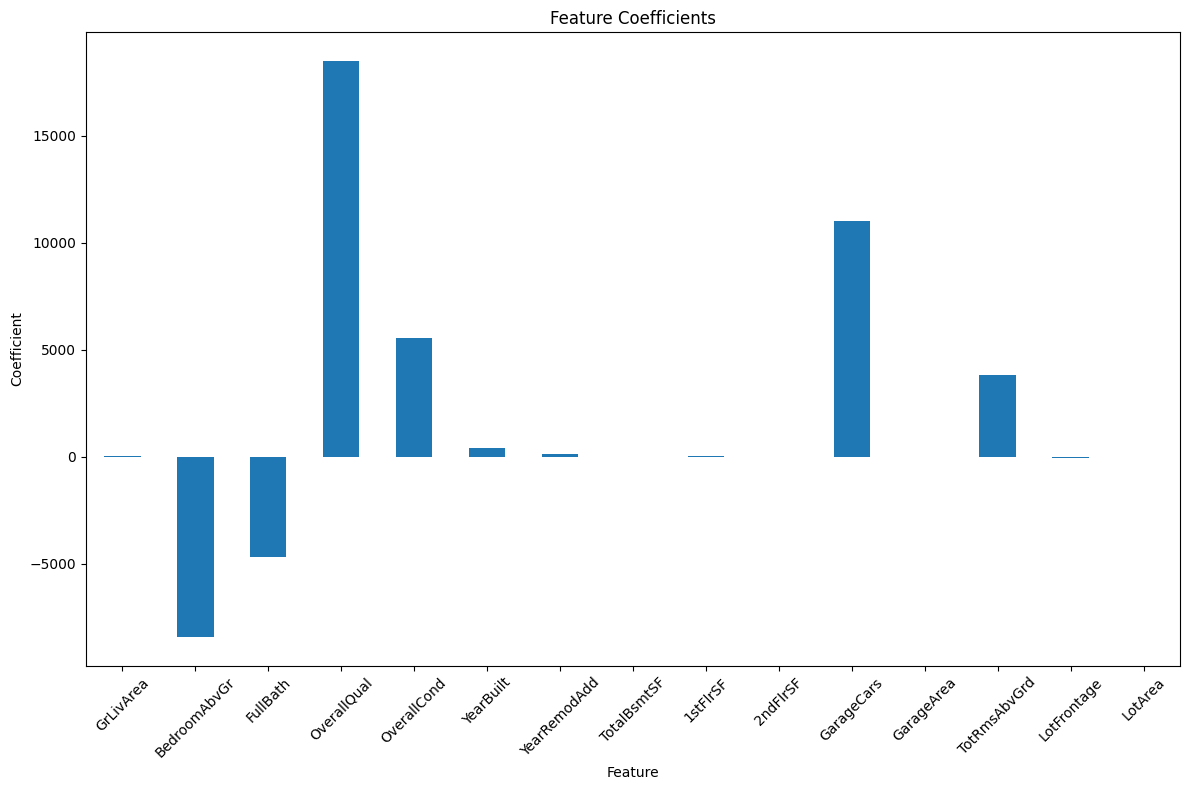

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('train.csv')

# Selecting features and target variable
features = [
    'GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GarageCars', 'GarageArea', 'TotRmsAbvGrd', 'LotFrontage', 'LotArea'
]
X = data[features]
y = data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test_imputed)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Printing the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:")
print(coefficients)

# Scatter plot of actual vs. predicted sale prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Prices")
plt.legend()
plt.show()

# Bar plot of feature coefficients
plt.figure(figsize=(12, 8))
coefficients['Coefficient'].plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Feature Coefficients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
